In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#Medias Iteradas

In [8]:
#df = pd.read_csv('Database/CovidSample.csv') #separador mal seleccionado
df = pd.read_csv('Database/CovidSample.csv', sep=';')

In [85]:
df

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,2020-05-29,2020-05-31,Bogotá,Kennedy,32,1,F,Relacionado,Casa,Recuperado
9995,9996,2020-05-28,2020-05-31,Bogotá,Usaquén,70,1,F,En estudio,Casa,Recuperado
9996,9997,2020-05-27,2020-05-31,Bogotá,Suba,32,1,F,Relacionado,Casa,Recuperado
9997,9998,2020-05-27,2020-05-31,Bogotá,Suba,2,1,M,Relacionado,Casa,Recuperado


In [86]:
df.describe() #variables numericas

,CASO,EDAD,UNI_MED
count,9999.000000,9999.000000,9999.000000
mean,5000.000000,38.730573,1.009101
std,2886.607005,18.495692,0.101090
min,1.000000,1.000000,1.000000
25%,2500.500000,26.000000,1.000000
50%,5000.000000,37.000000,1.000000
75%,7499.500000,51.000000,1.000000
max,9999.000000,103.000000,3.000000


In [87]:
df.info() #valores no asignados para hacer limpieza (los mas pequeños contra el total)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CASO                         9999 non-null   int64 
 1   FECHA_DE_INICIO_DE_SINTOMAS  9833 non-null   object
 2   FECHA_DIAGNOSTICO            9999 non-null   object
 3   CIUDAD                       9999 non-null   object
 4   LOCALIDAD_ASIS               9999 non-null   object
 5   EDAD                         9999 non-null   int64 
 6   UNI_MED                      9999 non-null   int64 
 7   SEXO                         9999 non-null   object
 8   FUENTE_O_TIPO_DE_CONTAGIO    9999 non-null   object
 9   UBICACION                    9999 non-null   object
 10  ESTADO                       9999 non-null   object
dtypes: int64(3), object(8)
memory usage: 859.4+ KB


In [18]:
#N = df.value_counts(df.CASO) #Contar para dar caraterizacion

In [88]:
#Para obtener el valor total usamos shape
N = df.shape[0] #Poblacion

In [89]:
df.head(10) #ver los primeros 10 registros

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
5,6,2020-03-08,2020-03-13,Bogotá,Suba,61,1,F,Importado,Casa,Recuperado
6,7,2020-02-28,2020-03-13,Bogotá,Teusaquillo,73,1,F,Importado,Casa,Recuperado
7,8,2020-03-06,2020-03-13,Bogotá,Chapinero,54,1,M,Importado,Casa,Recuperado
8,9,2020-03-10,2020-03-13,Bogotá,Engativá,54,1,F,Relacionado,Casa,Recuperado
9,10,2020-03-08,2020-03-14,Bogotá,Fontibón,23,1,M,Relacionado,Casa,Recuperado


In [90]:
# Limpieza de datos (Dejar solo las mujeres) con condiciones
# Usamos mascaras

In [91]:
maskF = df['SEXO'] == 'F' # Columna == VALOR CONDICIONAL
maskF # responde a la condicion aplicada

0        True
1        True
2        True
3        True
4        True
        ...  
9994     True
9995     True
9996     True
9997    False
9998     True
Name: SEXO, Length: 9999, dtype: bool

In [92]:
df1 = df[maskF]

In [93]:
df1

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2020-05-28,2020-05-31,Bogotá,Puente Aranda,22,1,F,Relacionado,Casa,Recuperado
9994,9995,2020-05-29,2020-05-31,Bogotá,Kennedy,32,1,F,Relacionado,Casa,Recuperado
9995,9996,2020-05-28,2020-05-31,Bogotá,Usaquén,70,1,F,En estudio,Casa,Recuperado
9996,9997,2020-05-27,2020-05-31,Bogotá,Suba,32,1,F,Relacionado,Casa,Recuperado


In [94]:
# calcular la probabilidad que sea mujer
NF = df1.shape[0]

In [95]:
PF = NF/N
PF 

0.4821482148214821

In [96]:
maskM = df['SEXO'] == 'M'
maskM

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997     True
9998    False
Name: SEXO, Length: 9999, dtype: bool

In [97]:
df2 = df[maskM]

In [98]:
NM = df2.shape[0]
NM

5178

In [99]:
PM = NM/N 

In [100]:
print(f"P(MujerAfectada): ", PF, f"\nP(HombreAfectado): " , PM , f"\nP(Total):", PF+PM)

P(MujerAfectada):  0.4821482148214821 
P(HombreAfectado):  0.5178517851785178 
P(Total): 1.0


In [72]:
#En caso que tenga diferente probablidad requiere tomar mas valores de un lado que del otro (mas hombres que mujeres para poder hacer inferencias)

In [73]:
#Filtro para Fallecidos
maskFallecidos = df['ESTADO'] == 'Fallecido'

In [135]:
df3 = df[ maskF & maskFallecidos ]

In [106]:
#Tabla de contingencia para relacionar dos variables

# Tabla de contingencia

In [151]:
CrossEdadF = pd.crosstab( index = df3['EDAD'], columns = df3['ESTADO'])
print("EstratoF : ", CrossEdadF.shape[0])

EstratoF :  52


<Axes: xlabel='EDAD'>

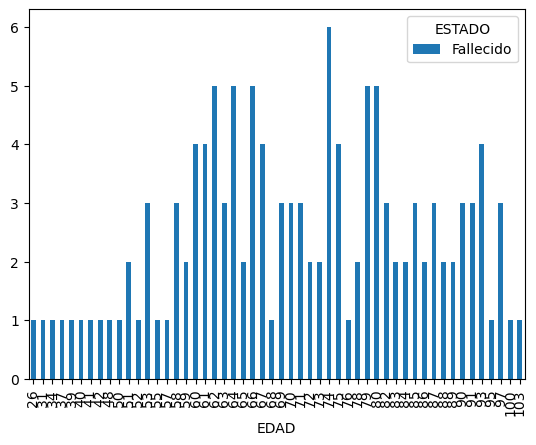

In [152]:
CrossEdadF.plot(kind="bar")

In [153]:
#caso 1 : Edad media de fallecimientos de F
#caso 2 : Probabildiad de fallecimientos de F

#tarea 1 : Edad media de fallecimientos de M
#tarea 2 : Probabildiad de fallecimientos de M

In [139]:
#1 Calculamos el promedio ponderado
#Esperanza de la variable

$$ E(x) = \sum_{i=1}^{n} p(x)x $$

In [140]:
#Media aritmetcia p(x)/n

In [141]:
EdadF = np.array(CrossEdadF.index) # selecciono un array con los indices de la tabla de contingencia

In [142]:
Proporcion_F_Fallecida = np.array(CrossEdadF.Fallecido)

In [143]:
PFallecimientoF = Proporcion_F_Fallecida/np.sum(Proporcion_F_Fallecida)
#Pesos de ponderacion de la media

In [144]:
meanF = np.sum(Edad*PFallecimientoF)
meanF

71.03149606299213